# AAM-IPL Week-8 LDA/GDA - Finding Breast Cancer
**Implemented By**: Venkateswar Reddy Melachervu </br>
**Branch of Study**:CS-Core and CS-AI and ML </br>
**Department**: CSM </br>
**Semester**: V 2024-25 AY </br>
**Email**: venkat@brillium.in </br>
**Guest Faculty and Instructor**: Venkateswar Reddy Melachervu, CTO, Brillium Technologies </br>
**Program Coordinator**: Prof. V.Suresh, CSM, GPREC </br>

**Project Implementation Details**: </br>
As published in the project announcement in AAM-IPL Online Classroom


**AAM-IPL of GPREC is brought to you by Brillium Technologies.**

In [ ]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install ffmpeg-python

Assigned 12 cores to LOKY_MAX_CPU_COUNT


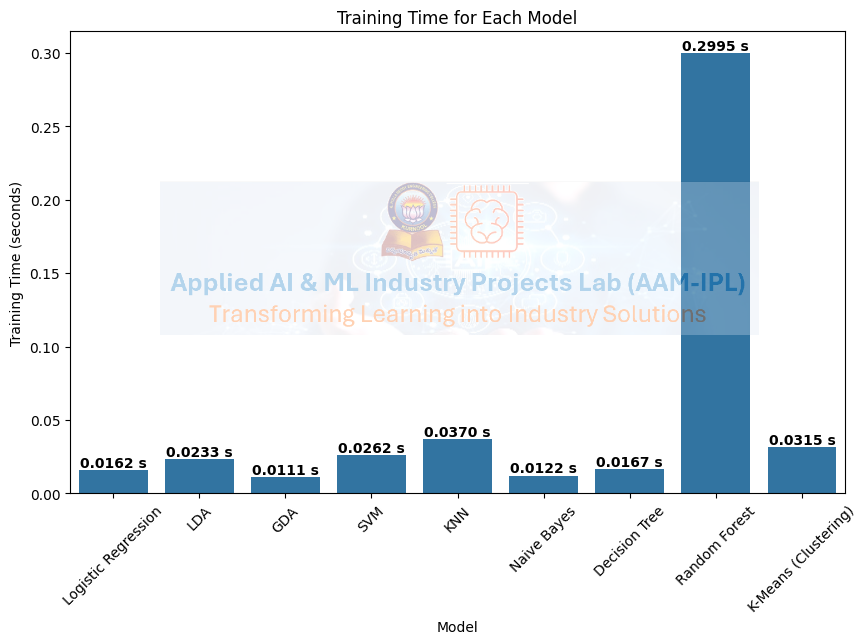

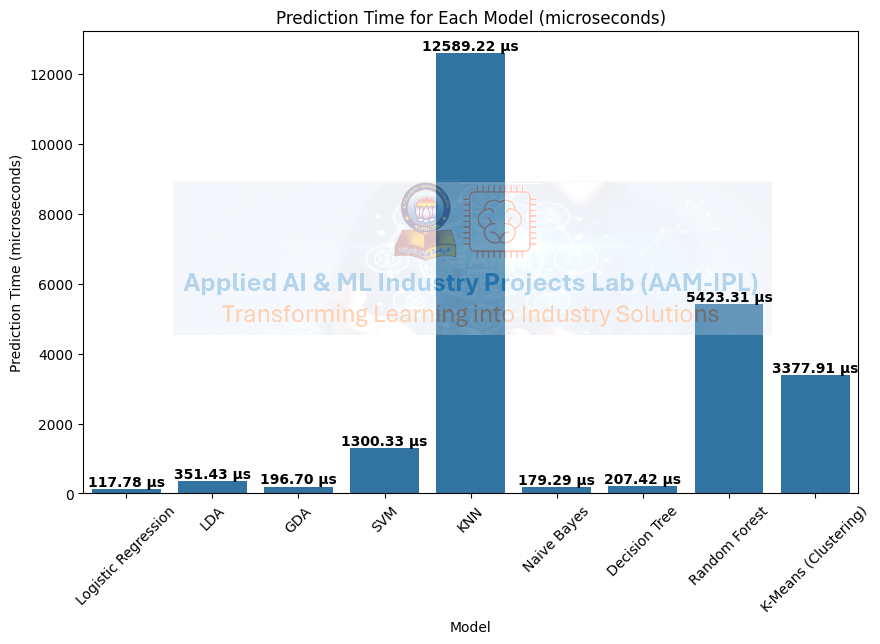

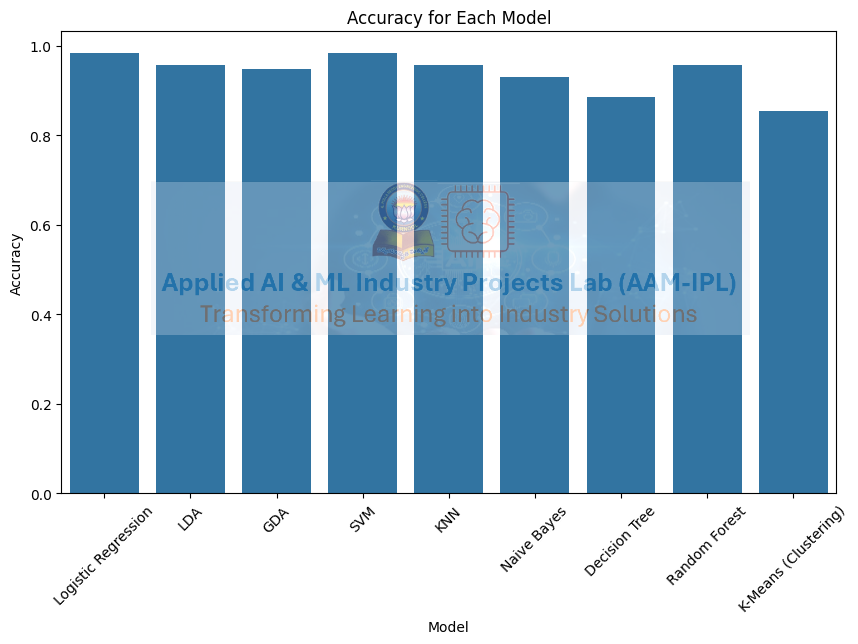

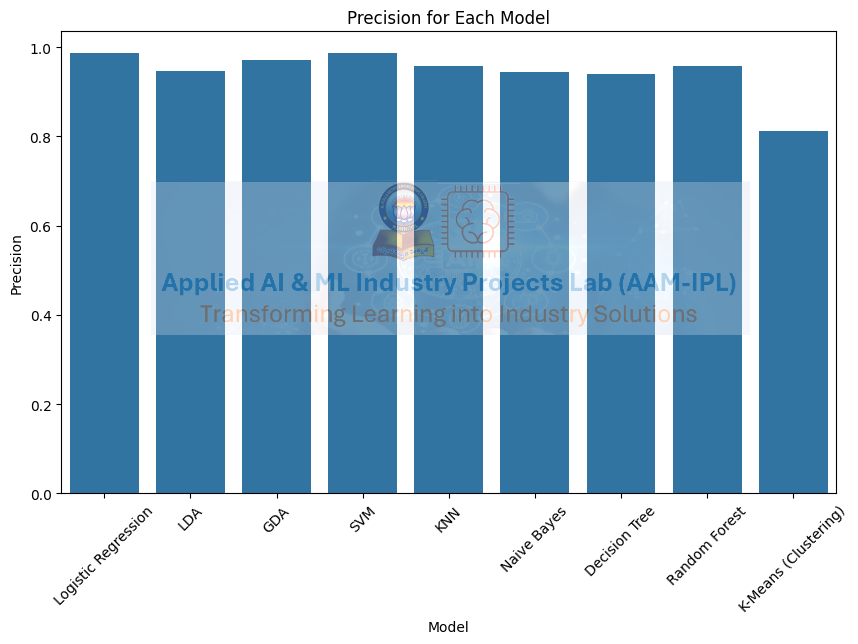

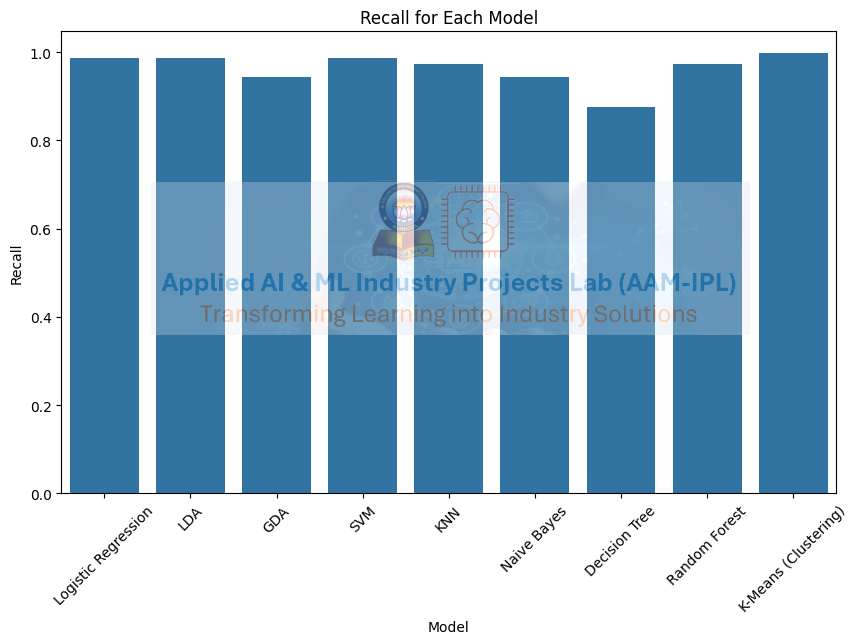

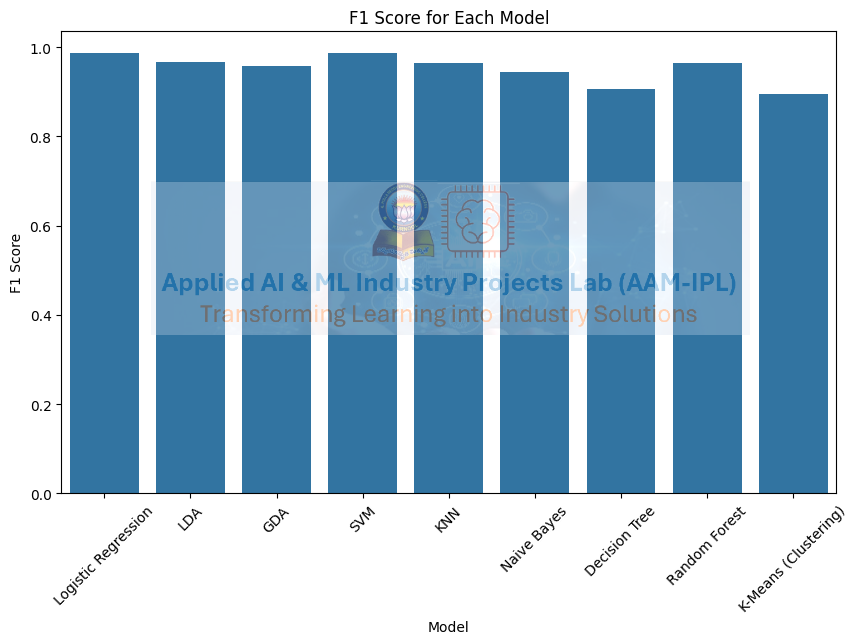

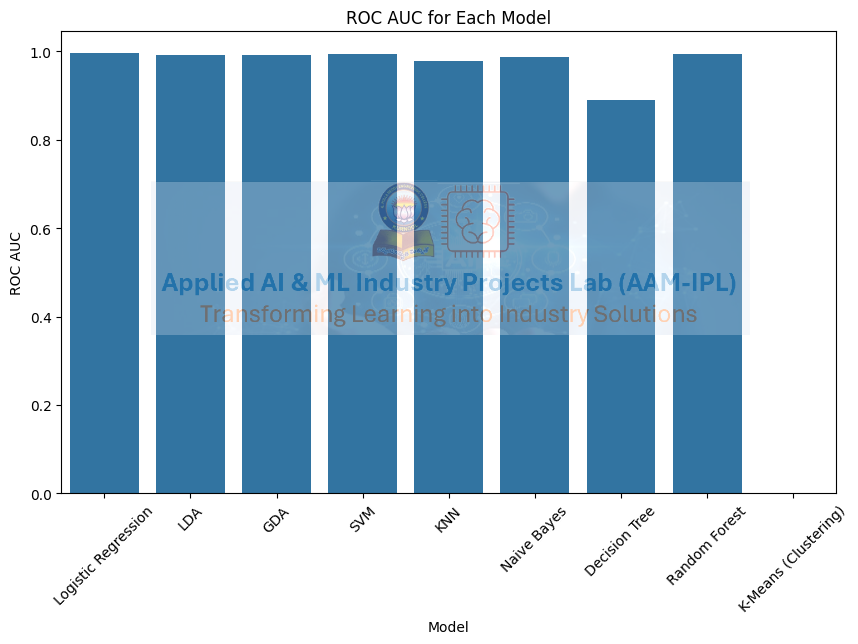

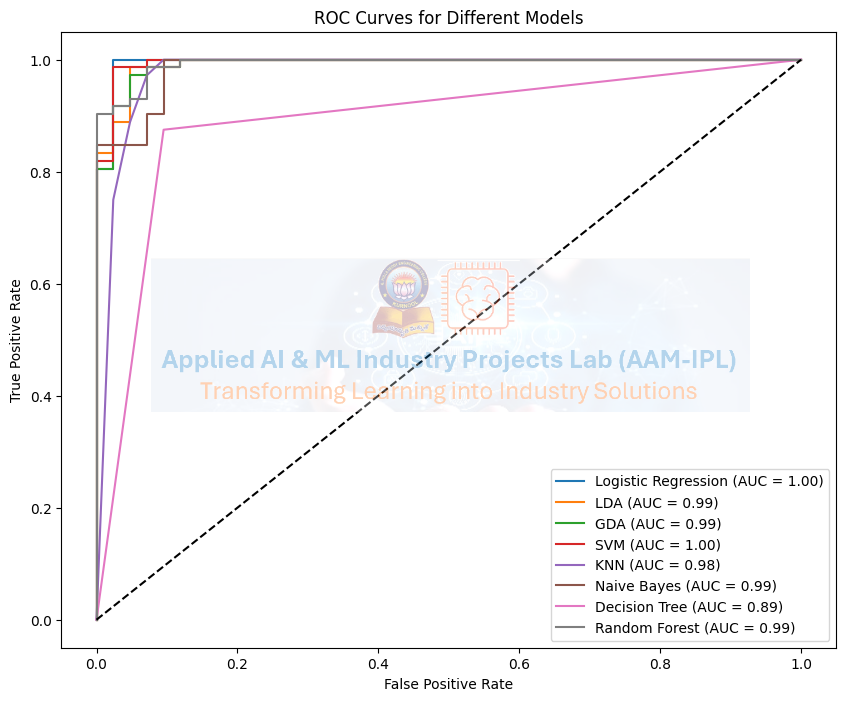

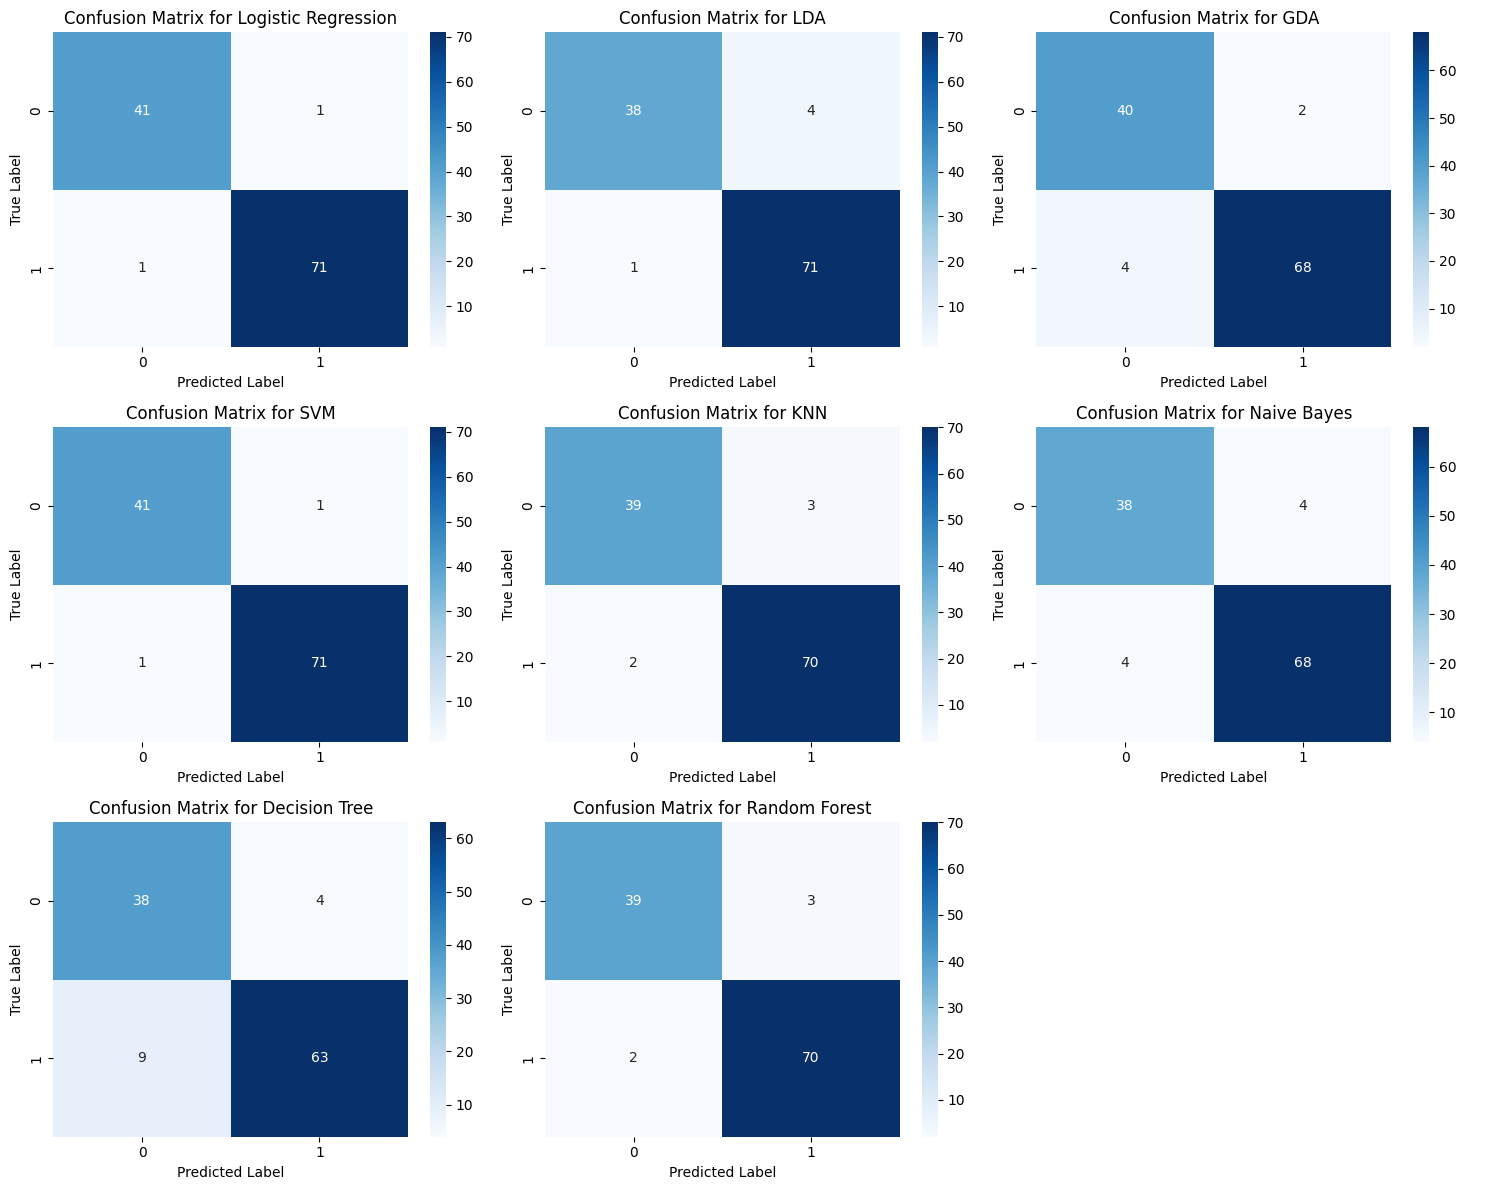

In [13]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.transforms import Affine2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import time
import os
import multiprocessing

# Set LOKY_MAX_CPU_COUNT to CPU count on the fly
cpu_count = multiprocessing.cpu_count()
os.environ["LOKY_MAX_CPU_COUNT"] = str(cpu_count)
print(f"Assigned {cpu_count} cores to LOKY_MAX_CPU_COUNT")

# Define name, email, and watermark image path
name = "Venkateswar Reddy Melachervu"
email = "venkat.reddy.gf@gprec.ac.in"

# Load the watermark image (make sure this file exists in your directory)
aam_ipl_wama_image = plt.imread('AAM-IPL-Watermark-for-Plots.png')

# Function to add a diagonal watermark
def add_aam_ipl_wama_revised(ax, watermark_image, zoom, alpha=0.3, rotation_angle=45):
    imagebox = OffsetImage(watermark_image, alpha=alpha, zoom=zoom)
    trans_data = Affine2D().rotate_deg(rotation_angle) + ax.transData
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0, transform=trans_data)
    ax.add_artist(ab)

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'GDA': QuadraticDiscriminantAnalysis(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Means (Clustering)': KMeans(n_clusters=2, random_state=42)
}

# Train models, make predictions, and evaluate
results = []
for name, model in models.items():
    # Measure training time
    start_time = time.time()
    if name == 'K-Means (Clustering)':
        model.fit(X.values)  # Fit K-Means on numpy array to avoid feature name mismatch
        y_pred = model.predict(X.values)  # Predict on the same structure
        if accuracy_score(y, y_pred) < 0.5:
            y_pred = 1 - y_pred
        y_proba = None
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = None
        conf_matrix = confusion_matrix(y, y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        conf_matrix = confusion_matrix(y_test, y_pred)
    
    train_time = time.time() - start_time
    
    # Measure prediction time accurately
    start_time = time.time()
    model.predict(X_test)  # Perform prediction on test set
    pred_time = time.time() - start_time

    # Append results
    results.append({
        'Model': name,
        'Training Time': train_time,
        'Prediction Time': pred_time,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    })

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)
results_df['Prediction Time (µs)'] = results_df['Prediction Time'] * 1_000_000  # Convert prediction time to microseconds
results_df['Prediction Time (µs)'] = results_df['Prediction Time (µs)'].fillna(0)

# Plot training time with data labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time', data=results_df)
plt.xticks(rotation=45)
plt.title('Training Time for Each Model')
ax = plt.gca()
add_aam_ipl_wama_revised(ax, aam_ipl_wama_image, zoom=0.4, alpha=0.3, rotation_angle=45)
for index, value in enumerate(results_df['Training Time']):
    ax.text(index, value, f"{value:.4f} s", ha='center', va='bottom', fontweight='bold')
plt.ylabel('Training Time (seconds)')
plt.show()

# Plot prediction time in microseconds with data labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Prediction Time (µs)', data=results_df)
plt.xticks(rotation=45)
plt.title('Prediction Time for Each Model (microseconds)')
ax = plt.gca()
add_aam_ipl_wama_revised(ax, aam_ipl_wama_image, zoom=0.4, alpha=0.3, rotation_angle=45)
for index, value in enumerate(results_df['Prediction Time (µs)']):
    ax.text(index, value, f"{value:.2f} µs", ha='center', va='bottom', fontweight='bold')
plt.ylabel('Prediction Time (microseconds)')
plt.show()

# Plot metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'{metric} for Each Model')
    ax = plt.gca()
    add_aam_ipl_wama_revised(ax, aam_ipl_wama_image, zoom=0.4, alpha=0.3, rotation_angle=45)
    plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name != 'K-Means (Clustering)' and hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
ax = plt.gca()
add_aam_ipl_wama_revised(ax, aam_ipl_wama_image, zoom=0.4, alpha=0.3, rotation_angle=45)
plt.show()

# Combined plot for all confusion matrices, excluding K-Means
models_with_conf_matrix = {name: model for name, model in models.items() if name != 'K-Means (Clustering)'}
num_models = len(models_with_conf_matrix)  # Only models with confusion matrices

# Set up subplot grid dimensions
cols = 3  # Number of columns in the subplot grid
rows = (num_models + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten to easily iterate over axes

# Loop over each model and plot its confusion matrix
for idx, (name, model) in enumerate(models_with_conf_matrix.items()):
    # Predict and compute confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix in the respective subplot
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix for {name}')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

# Turn off any remaining empty subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [14]:
# Generate the PDF of code and output of project jupyter file
!jupyter nbconvert --to pdf AAM-IPL-Wk-8-LDA-GDA-Breast-Cancer-Comparative-Full-Code-V1.0.ipynb

c:\Program Files\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
[NbConvertApp] Converting notebook AAM-IPL-Wk-8-LDA-GDA-Breast-Cancer-Comparative-Full-Code-V1.0.ipynb to pdf
[NbConvertApp] Support files will be in AAM-IPL-Wk-8-LDA-GDA-Breast-Cancer-Comparative-Full-Code-V1.0_files\
[NbConvertApp] Making directory .\AAM-IPL-Wk-8-LDA-GDA-Breast-Cancer-Comparative-Full-Code-V1.0_files
[NbConvertApp] Writing 50722 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING 